In [1]:
# Capcitaed Vehicle Routing problem. 
# Minimize the number of trips by a vehicle based on the capacity of the vehicle delivering quantities to customers
import numpy as np

In [2]:
rnd = np.random
rnd.seed(0)

In [3]:
n = 10 #number of customers/locations
Q = 20 #vehicle capacity
N = [i for i in range(1, n+1)] #customer set
V = [0] + N # set of nodes, customer + 1 depot
q = {i: rnd.randint(1, 10) for i in N} #amount to be delivered to this client random number from 1 to 10


In [4]:
loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

In [5]:
import matplotlib.pyplot as plt

(-5.390764142541891, 202.16699573081289, 7.525723005074169, 102.16355380509556)

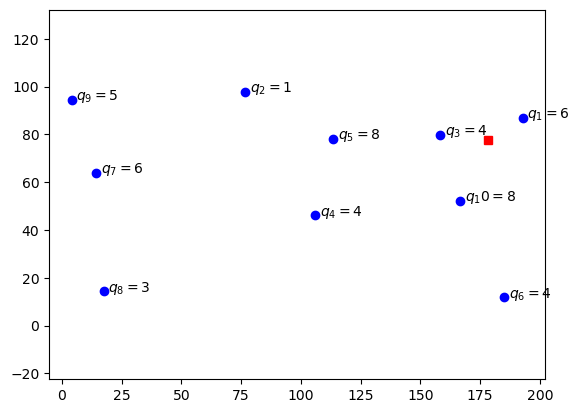

In [6]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')

In [7]:
A = [(i, j) for i in V for j in V if i != j] #A is set of arcs
c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A} # cost to travel over the arcs

In [8]:
from docplex.mp.model import Model

In [9]:
mdl = Model('CVRP')

In [10]:
x = mdl.binary_var_dict(A, name='x') # dictionary of arcs
u = mdl.continuous_var_dict(N, ub=Q, name='u') #dictionary of packages/quantities to be delivered at each customer

In [11]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A)) # minimize distance travelled
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N) # ensure each customer is visited only once
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N) # ensure vehicle leaves the customer location
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0) #route starts from depot and does not go in subtour(??)
mdl.add_constraints(u[i] >= q[i] for i in N) #truck's capacity is greater than customer's quantity to be delivered
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Threads                                 2
CPXPARAM_TimeLimit                               15
Found incumbent of value 1784.255531 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.01 sec. (0.35 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.00 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.31 ticks)
Clique table members: 65.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: de

In [12]:
print(solution)

solution for: CVRP
objective: 726.249
status: OPTIMAL_SOLUTION(2)
x_0_2=1
x_0_3=1
x_0_10=1
x_1_0=1
x_2_9=1
x_3_5=1
x_4_0=1
x_5_0=1
x_6_1=1
x_7_8=1
x_8_4=1
x_9_7=1
x_10_6=1
u_1=18.000
u_2=2.000
u_3=12.000
u_4=20.000
u_5=20.000
u_6=12.000
u_7=13.000
u_8=16.000
u_9=7.000
u_10=8.000



In [13]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [14]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(-5.390764142541891, 202.16699573081289, 7.525723005074169, 102.16355380509556)

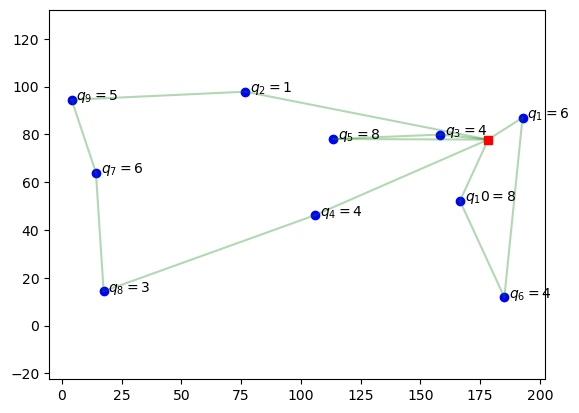

In [15]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')